# 1.  EDA Workfolw 

## Setup

Data manipulation libraries:

In [1]:
import pandas as pd
import numpy  as np

Visualization libraries:

In [2]:
import matplotlib.pyplot  as plt
import seaborn            as sns

plt.style.use('fivethirtyeight')

%matplotlib inline

Pre-processing libraries:

In [37]:
from sklearn.model_selection  import train_test_split

from scipy.stats              import boxcox 
from tqdm.notebook            import tqdm

import datetime

## Data-set

In [5]:
file_path = 'BitcoinHeistData.csv'

data = pd.read_csv(file_path)

## Data Overview

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   address    object 
 1   year       int64  
 2   day        int64  
 3   length     int64  
 4   weight     float64
 5   count      int64  
 6   looped     int64  
 7   neighbors  int64  
 8   income     float64
 9   label      object 
dtypes: float64(2), int64(6), object(2)
memory usage: 222.5+ MB


In [7]:
data.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


In [8]:
data.sample(5)

,address,year,day,length,weight,count,looped,neighbors,income,label
2006148,1F4NUHu4JUvYtucouRfwLSZZJcH7PNg6fP,2016,150,78,3.906250e-03,1,0,2,60069027.0,white
1124905,1BbxRrKL8Qn3LZ29EXMw2kKoybKPvq9V2M,2013,364,144,4.167522e-10,810,1,1,67855000.0,white
2201141,3DVGK1afPJcPq88dA64no6BFqhjYERykqk,2016,345,2,8.333333e-02,1,0,7,41073306.0,white
2585298,1Gpfxx1A2XEj1rJPcBY3UVyWKUu2iCyaHY,2017,364,16,4.166667e-04,1,0,2,88691572.0,white
1943698,3FEzNJiu1bVqFTAiGaixiFnsbpceusFFbG,2016,88,144,2.359284e-03,654,0,2,158836377.0,white


In [9]:
data.tail()

,address,year,day,length,weight,count,looped,neighbors,income,label
2916692,12D3trgho1vJ4mGtWBRPyHdMJK96TRYSry,2018,330,0,0.111111,1,0,1,1.255809e+09,white
2916693,1P7PputTcVkhXBmXBvSD9MJ3UYPsiou1u2,2018,330,0,1.000000,1,0,1,4.409699e+07,white
2916694,1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw,2018,330,2,12.000000,6,6,35,2.398267e+09,white
2916695,15iPUJsRNZQZHmZZVwmQ63srsmughCXV4a,2018,330,0,0.500000,1,0,1,1.780427e+08,white
2916696,3LFFBxp15h9KSFtaw55np8eP5fv6kdK17e,2018,330,144,0.073972,6800,0,2,1.123500e+08,white


In [10]:
print('Data has {} rows and {} columns'.format(data.shape[0], data.shape[1]))

Data has 2916697 rows and 10 columns


In [11]:
print('Data columns: \n{}'.format(list(data.columns)[:-1]))

Data columns: 
['address', 'year', 'day', 'length', 'weight', 'count', 'looped', 'neighbors', 'income']


## Checking for NaN

In [12]:
data.isnull().values.any()

False

## Droping any duplicates 

In [13]:
data = data.drop_duplicates()

In [14]:
data.shape

(2916697, 10)

## Rename 

The count column may confuse the computer with the count() function,
so lets rename it.

In [15]:
data.rename(columns={'count':'counted'},inplace=True)

##  Distribution of the features

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

(30000000.0, 49964398238996.0)

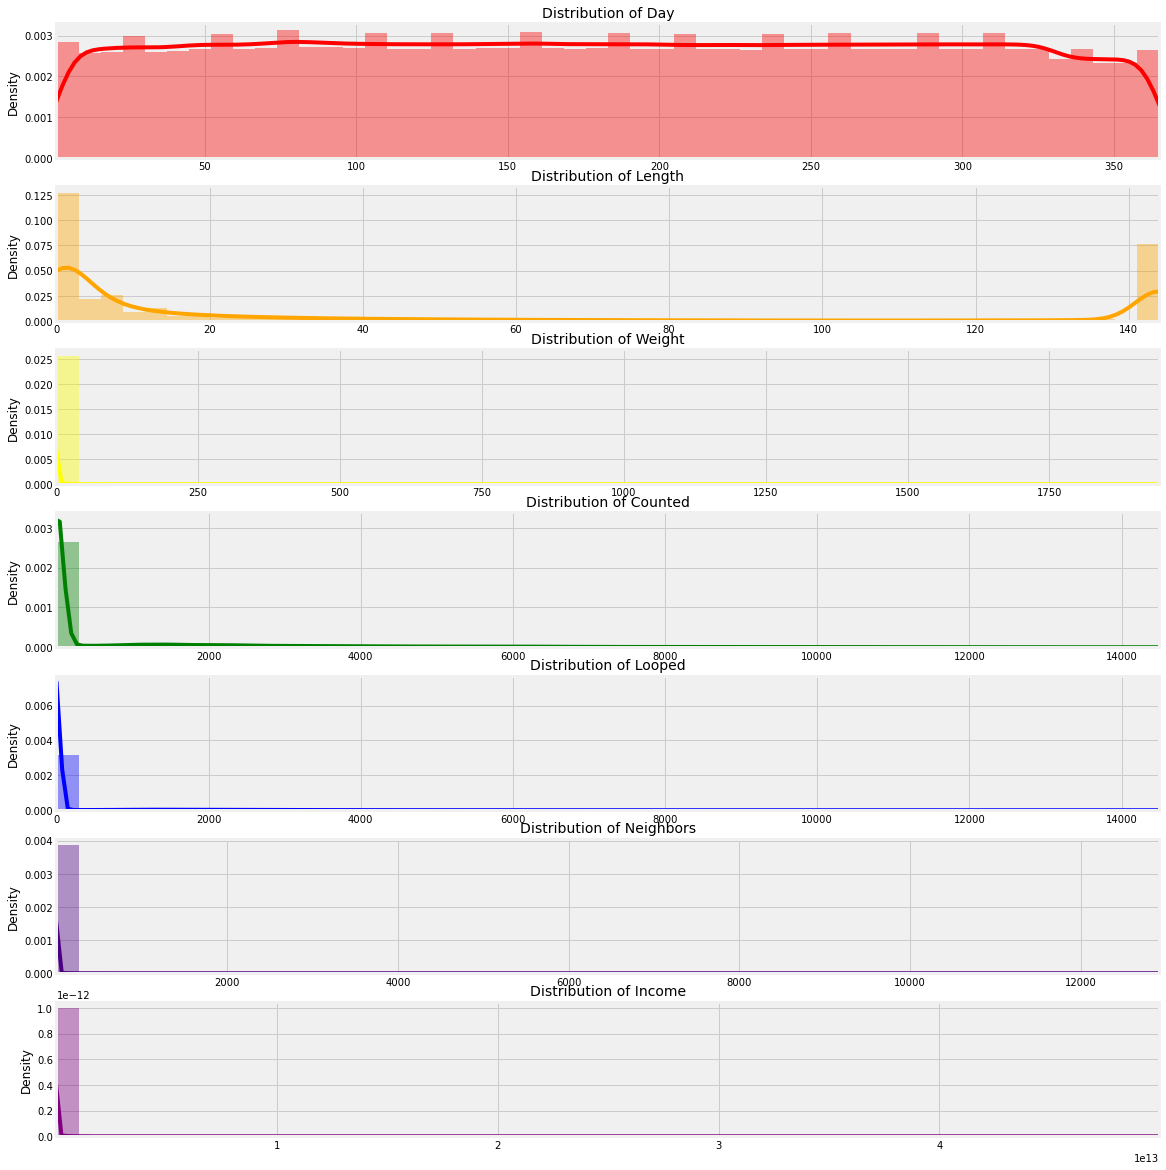

In [16]:
# distplot to show how the data is distributed.

fig, ax = plt.subplots(7, 1,figsize=(16,16))
fig.tight_layout()

day_val       = data.day.values
length_val    = data.length.values
weight_val    = data.weight.values
counted_val   = data.counted.values
looped_val    = data.looped.values
neighbors_val = data.neighbors.values
income_val    = data.income.values

sns.distplot(day_val, ax=ax[0],color='red')
ax[0].set_title('Distribution of Day', fontsize=14)
ax[0].set_xlim([min(day_val), max(day_val)])

sns.distplot(length_val, ax=ax[1],color='orange')
ax[1].set_title('Distribution of Length', fontsize=14)
ax[1].set_xlim([min(length_val), max(length_val)])

sns.distplot(weight_val, ax=ax[2],color='yellow')
ax[2].set_title('Distribution of Weight', fontsize=14)
ax[2].set_xlim([min(weight_val), max(weight_val)])

sns.distplot(counted_val, ax=ax[3],color='green')
ax[3].set_title('Distribution of Counted', fontsize=14)
ax[3].set_xlim([min(counted_val), max(counted_val)])

sns.distplot(looped_val, ax=ax[4],color='blue')
ax[4].set_title('Distribution of Looped', fontsize=14)
ax[4].set_xlim([min(looped_val), max(looped_val)])

sns.distplot(neighbors_val, ax=ax[5],color='indigo')
ax[5].set_title('Distribution of Neighbors', fontsize=14)
ax[5].set_xlim([min(neighbors_val), max(neighbors_val)])

sns.distplot(income_val, ax=ax[6],color='purple')
ax[6].set_title('Distribution of Income', fontsize=14)
ax[6].set_xlim([min(income_val), max(income_val)])

Since the data is not in normal distribution, we will perform the Box-Cox transformation to transforms our data so that it closely resembles a normal distribution.
you will see later how the Box-Cox you change the distribution.

##  Classes preparing

The positive class is any kind of "ransomware label" will takes '1' as value.  
The negative class is the "White label" will takes '0' as value. 

In [17]:
labels = np.array([])
for label_i in tqdm(data['label']):
    if label_i == 'white':
        labels = np.append(labels, 0) #not ransomware
    else:
        #all non-white (i.e. families of ransomware) will be binned under one class
        labels = np.append(labels, 1) #ransomware

  0%|          | 0/2916697 [00:00<?, ?it/s]

In [18]:
print('Number of white (non-ransomware) datapoints: {}\nNumber of ransomware datapoints: {}'\
      .format(data['label'].value_counts()[0], 
              sum(data['label'].value_counts()[1:])
             ))

Number of white (non-ransomware) datapoints: 2875284
Number of ransomware datapoints: 41413


In [19]:
print('Percentage of data-points belonging to ransomware class: {}'.format((sum(labels) / len(labels)) * 100))

Percentage of data-points belonging to ransomware class: 1.4198595191752863


## Train test split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['label'], axis=1), 
    labels,
    stratify = labels, #Having equal number of positive class in both training and testing
    random_state = 42,
    test_size = 0.2
)

In [24]:
#storing the stock dataframes for later use
X_train_stock = X_train.copy()
X_test_stock  = X_test.copy()

# Feature engineering

Extract features from raw data via data mining techniques,  
these features can be used to improve the performance of machine learning algorithms.

### 1. n_address_feature

The feature contains the number of times the address has been seen in the training set  
(boxcox transformation applied)

In [25]:
X_train['address'].value_counts()

1LXrSb67EaH1LGc6d6kWHq8rgv4ZBQAcpU    348
16cVG72goMe4sNqZhnpmnqfCMZ1uSFbUit    206
12wQZTDmA8onM3sEt4jwcvzDxnNXxD8Vza    174
12YursV58dRT2c9iuZg3jEWfwgTDamBcnd    147
1CVWpTNwNYGdKgZRohiiVFrnFNbw8anG9     147
                                     ... 
18zvFQa7J5tchrhT96L9nsnwQqXdayr7UP      1
19GoHVARPHydHjHPuypjSMcfsD4Pbjf9FD      1
32x4VTzffhdSuXf9PC6HFDg3goYfBZjAfQ      1
12VBYQ1xR3FMa5GU3famRX9WKpWmEJzZyG      1
1E4wpSDSwgeP5pNkJEZ1jf3SEbahsVjxH9      1
Name: address, Length: 2121750, dtype: int64

In [26]:
n_addresses = list(X_train['address'].value_counts())

In [27]:
print('An address is repeated an average of {} number of times'.format(np.mean(n_addresses)))

An address is repeated an average of 1.0997322964533993 number of times


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


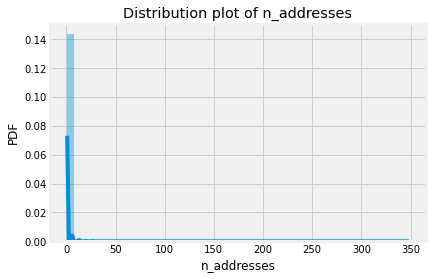

In [28]:
#plot to print distribution of n_addresses

plt.title('Distribution plot of n_addresses')
sns.distplot(n_addresses)
plt.xlabel('n_addresses')
plt.ylabel('PDF')
plt.show()

In [29]:
dict_n_address = dict(X_train['address'].value_counts())
#dict_n_address contains a dictionary of addresses and the number of times they appear in training set

n_address = boxcox(np.array(list(dict_n_address.values())))[0]
#Applying boxcox over all the number of times each address apears

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


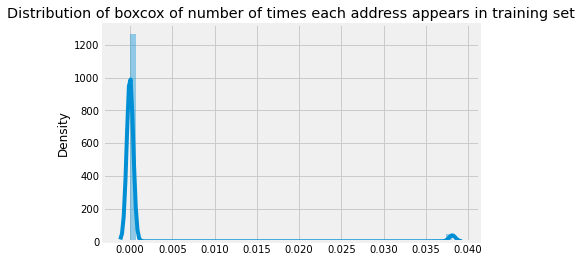

In [30]:
sns.distplot(n_address)
plt.title('Distribution of boxcox of number of times each address appears in training set')
plt.show()

In [32]:
len(n_address) == len(np.array(list(dict_n_address.values()))) #just a sanity check

True

In [33]:
for index, key in tqdm(enumerate(dict_n_address.keys())):
    #We are updating the dictionary with number of times each address appears with
    #the boxcox transformation applied to fix the skewness
    updated = {key: n_address[index]}
    dict_n_address.update(updated)

0it [00:00, ?it/s]

In [34]:
pd.Series(list(dict_n_address.values())).value_counts()

0.000000    2046548
0.038124      43000
0.038124      19373
0.038124      12829
dtype: int64

In [35]:
n_address_feature_train = np.array([])

for index, row in tqdm(X_train.iterrows(), total=X_train.shape[0]):
    #We are getting a list of the new values
    #For each address in the training set we are appending its corresponding boxcox'd
    #number of times its appeared in training set

    n_address_i = dict_n_address.get(X_train.loc[index]['address']) 
    n_address_feature_train = np.append(n_address_feature_train, n_address_i)

  0%|          | 0/2333357 [00:00<?, ?it/s]

In [36]:
n_address_feature_test = np.array([])
min_dict_n_address = min(list(dict_n_address.values()))

for index, row in tqdm(X_test.iterrows(), total=X_test.shape[0]):
    try:
        #we do the same as above

        n_address_i = dict_n_address[X_test.loc[index]['address']]
    except KeyError:
        #KeyError arises when the addreses in training set has not been seen before (i.e cold start)
        #For this, we assign the minimum value to it

        n_address_i = min_dict_n_address #Addressing cold start
    n_address_feature_test = np.append(n_address_feature_test, n_address_i)

  0%|          | 0/583340 [00:00<?, ?it/s]

### 2. quarter_number

Feature indicates which quarter of the year the day number belongs to.

In [38]:
def get_quarter(day):
    if day <= 91:
        #First 3 months, so we return quarter number = 1
        return 1
    elif day <= 91 * 2:
        #Next 3 months, quarter number = 2
        return 2
    elif day <= 91 * 3:
        #Next 3 months, quarter number = 3
        return 3
    else:
        #Last 4 months, quarter nubmer = 4
        return 4

In [39]:
quarter_number_feature_train = np.array([])
day_train = X_train['day']

for day in tqdm(day_train):
    #For each day, we append its correspoding quarter number

    quarter_number_feature_train = np.append(quarter_number_feature_train, get_quarter(day))

  0%|          | 0/2333357 [00:00<?, ?it/s]

In [40]:
quarter_number_feature_test = np.array([])
day_test = X_test['day']

for day in tqdm(day_test):
    #Doing the same for test set

    quarter_number_feature_test = np.append(quarter_number_feature_test, get_quarter(day))

  0%|          | 0/583340 [00:00<?, ?it/s]

### 3. is_close_to_holiday

Feature indicates if the day number was close to a major public holiday in America.

In [41]:
public_holidays = [
    1, #New Year’s Day, January 1
    15, #Birthday of Martin Luther King, Jr, 15 January
    53, #Washington's birthday February 22
    151, #Memorial day, May 31
    185, #Independence day, July 4
    121, #Labor day, May 1
    285, #Columbus day, October 12
    315, #Veteran's day, November 11
    330, #Thanksgiving day, November 26
    360, #Christmas day, December 25
]

In [42]:
def is_close(holiday, day):
    #if the day is within 1 week leading upto the holiday or after the holiday return True
    if np.abs(holiday - day) > 7:
        return 0
    return 1

In [43]:
is_close_to_holiday_train = np.array([], dtype=int)
for index, day in tqdm(enumerate(X_train['day'])):
    #For each day, we check if its close to any major holiday; if so, we append 1 else 0

    is_close_to_holiday_train = np.append(is_close_to_holiday_train, any([is_close(holiday, day) for holiday in public_holidays]))

0it [00:00, ?it/s]

In [44]:
is_close_to_holiday_test = np.array([], dtype=int)
for index, day in tqdm(enumerate(X_test['day'])):
    #Same as above but for test set

    is_close_to_holiday_test = np.append(is_close_to_holiday_test, any([is_close(holiday, day) for holiday in public_holidays]))

0it [00:00, ?it/s]

### 4. day_of_the_week

Feature indicates the number of the weekday (for eg: 0 for Monday and 6 for Sunday).  
The hypothesis is that the day of the week might correlate with the nature of the transaction.

In [45]:
def get_day_number(first_day, day_i):
    #return day number (0 for monday, 6 for sunday) for day_i
    return (first_day + day_i - 1) % 7

In [46]:
day_of_week_train = np.array([])
for index, row in tqdm(X_train.iterrows()):
    #For each data-point, we consider its year and day and calculate what day of the week (Monday, Tuesday, etc)
    #it was when the transaction happened
    
    #datetime.datetime(year, 1, 1).weekday() returns the first day of the year in the year = year
    #using this information, we can calculate the present day

    year_i, day_i = row['year'], row['day']
    day_of_week_train = np.append(day_of_week_train, get_day_number(datetime.datetime(year_i, 1, 1).weekday(), day_i))

0it [00:00, ?it/s]

In [47]:
day_of_week_test = np.array([])
for index, row in tqdm(X_test.iterrows()):
    #same as above but for test set

    year_i, day_i = row['year'], row['day']
    day_of_week_test = np.append(day_of_week_test, get_day_number(datetime.datetime(year_i, 1, 1).weekday(), day_i))

0it [00:00, ?it/s]

### 5. gaussian_length

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

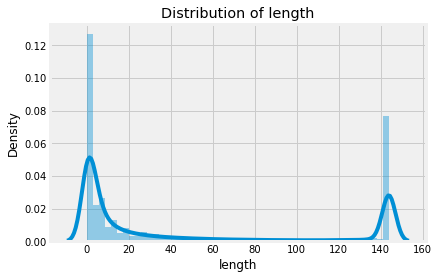

In [48]:
# Looking at its distribution

sns.distplot(X_train['length'])
plt.title('Distribution of length')
plt.plot()

Feature tries to fix the skewness of the length variable.   
This is done by applying complex functions over the length feature and then performing a boxcox operation on it.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


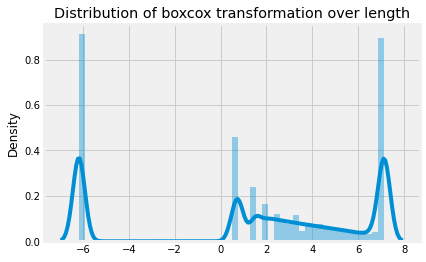

In [49]:
# applying box-cox transformation

sns.distplot(boxcox(np.array(X_train['length']) + 1e-6)[0])
plt.title('Distribution of boxcox transformation over length')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


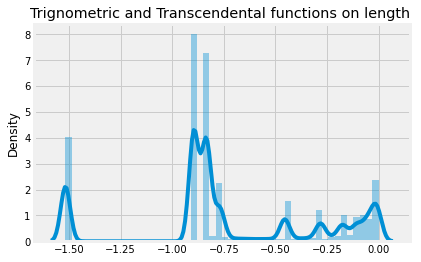

In [50]:
#We can see a sort of 'cyclic' waveform in the above graph. it appears that we have an
#alternating pattern of high and low values. maybe sin transform might help?

sns.distplot(boxcox((np.sin(np.log(np.sqrt(np.array(X_train['length']) + 1e-6)))) ** 2)[0])
plt.title('Trignometric and Transcendental functions on length ')
plt.show()

These transformations make the distribution more gaussian and thus, will help during modelling.

In [51]:
gaussian_length_train = boxcox((np.sin(np.log(np.sqrt(np.array(X_train['length']) + 1e-6)))) ** 2)[0]
gaussian_length_test  = boxcox((np.sin(np.log(np.sqrt(np.array(X_test['length']) + 1e-6)))) ** 2)[0]

### 6. gaussian_weight

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


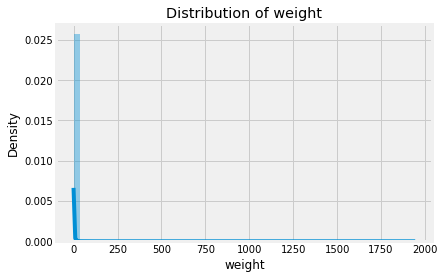

In [52]:
# Looking at its distribution

sns.distplot(X_train['weight'])
plt.title('Distribution of weight')
plt.show()

Feature corrects for the skewedness in weight.

C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


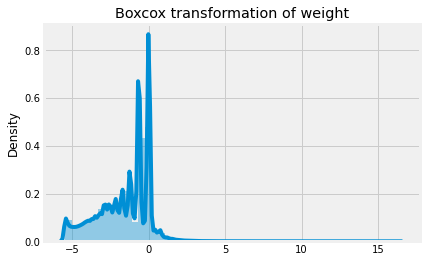

In [53]:
sns.distplot(boxcox(np.array(X_train['weight'], dtype=np.longdouble))[0])
plt.title('Boxcox transformation of weight')
plt.show()

Box-cox transformation over weight gives us a much more normal distribution.

In [54]:
#Apply boxcox transform on weight
gaussian_weight_train = np.array(boxcox(np.array(X_train['weight'],  dtype=float))[0])
#for test set as well
gaussian_weight_test  = np.array(boxcox(np.array(X_test['weight'],  dtype=float))[0])

C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


### 7. log_counted

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


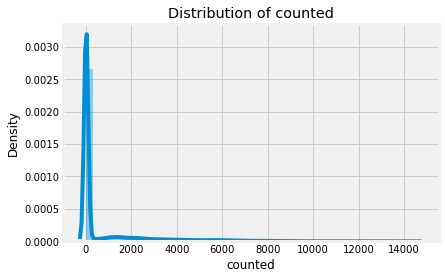

In [57]:
# Looking at its distribution

sns.distplot(X_train['counted'])
plt.title('Distribution of counted')
plt.show()

Performing log-transformation to fix skewedness.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


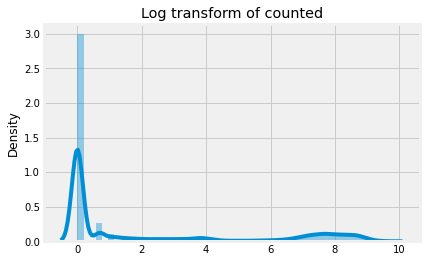

In [59]:
sns.distplot(np.log(np.array(X_train['counted']) + 1e-6))
plt.title('Log transform of counted')
plt.show()

While performing log to get a normal-distribution still gives us a skewed distribution, 
it is certainly better than the vanilla feature

In [60]:
#apply log-transform on training

log_count_train = np.log(np.array(X_train['counted']) + 1e-6)

#log transform for test

log_count_test = np.log(np.array(X_test['counted']) + 1e-6)

### 8. sigmoid_looped

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


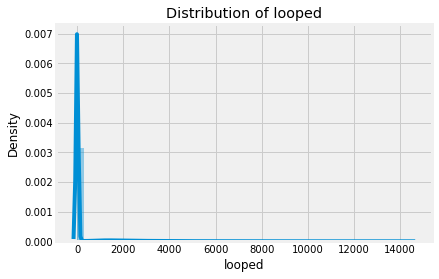

In [61]:
# Looking at its distribution

sns.distplot(X_train['looped'])
plt.title('Distribution of looped')
plt.show()


Performing sigmoid operation to fix skewedness.

In [62]:
def sigmoid(x):
    #returns the logistic function of x
    
    return 1 / (1 + np.exp(-x))

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


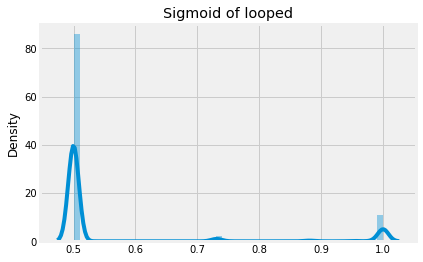

In [63]:
sns.distplot(sigmoid(np.array(X_train['looped'])))
plt.title('Sigmoid of looped')
plt.show()

Sigmoidal transformation gives the models a better distribution to work with.


In [64]:
#Applying logistic function on each element of looped

sigmoid_looped_train = sigmoid(np.array(X_train['looped']))
#Same for test

sigmoid_looped_test  = sigmoid(np.array(X_test['looped']))

### 9. gaussian_neighbors

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


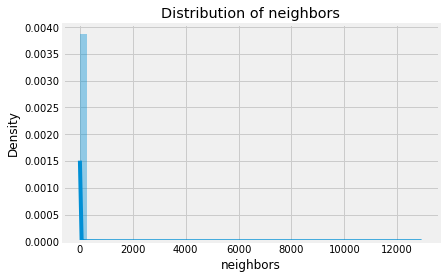

In [65]:
# Looking at its distribution

sns.distplot(X_train['neighbors'])
plt.title('Distribution of neighbors')
plt.show()

Feature tries to account for the extreme skewedness of neighbors by applying boxcox transformation.


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


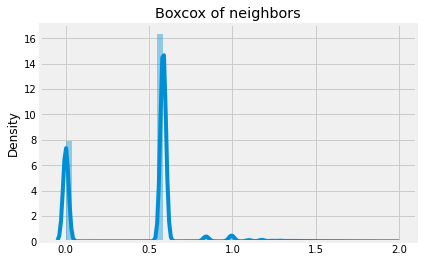

In [66]:
sns.distplot(boxcox(np.array(X_train['neighbors']) + 1e-6)[0])
plt.title('Boxcox of neighbors')
plt.show()

Boxcox transformation over Neighbors gives us a slighly more gaussian distribution.

In [67]:
#Applying boxcox transform for neighbors

gaussian_neighbors_train = boxcox(np.array(X_train['neighbors']) + 1e-6)[0]
#Same for test

gaussian_neighbors_test  = boxcox(np.array(X_test['neighbors']) + 1e-6)[0]

### 10. gaussian_income

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


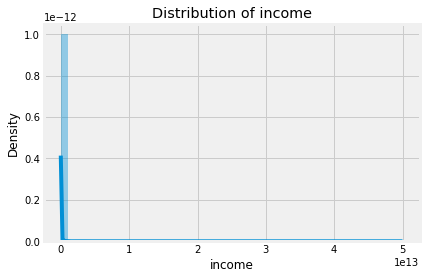

In [68]:
# Looking at its distribution

sns.distplot(X_train['income'])
plt.title('Distribution of income')
plt.show()

Feature tries to account for the extreme skewedness of income by applying boxcox transformation.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


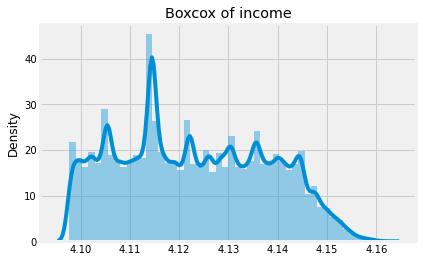

In [69]:
sns.distplot(boxcox(np.array(X_train['income']) + 1e-6)[0])
plt.title('Boxcox of income')
plt.show()

Boxcox transformation over Income gives us a psuedo-gaussian distribution.

In [70]:
#Applying boxcox on income

gaussian_income_train = boxcox(np.array(X_train['income']) + 1e-6)[0]
gaussian_income_test  = boxcox(np.array(X_test['income']) + 1e-6)[0]

## Interaction features

### 11. Interaction_length_weight

In [71]:
# Between length and weight

median_length = np.median(X_train['length'])
median_weight = np.median(X_train['weight'])

def get_length_weight(length_i, weight_i):
    #If length and weight are greater than the median, we will return 0
    #If just length is greater than the median we return 1
    #return 2 if length is lesser than median
    
    if length_i > median_length:
        if weight_i > median_weight:
            return 0
        else:
            return 1
    return 2

In [72]:
#Constructing the interaction feature for train

interaction_length_weight_train = np.array([])
for index, row in tqdm(X_train.iterrows(), total=X_train.shape[0]):
    interaction_length_weight_train = np.append(interaction_length_weight_train, get_length_weight(row['length'], row['weight']))

  0%|          | 0/2333357 [00:00<?, ?it/s]

In [73]:
#Same for test

interaction_length_weight_test = np.array([])
for index, row in tqdm(X_test.iterrows(), total=X_test.shape[0]):
    interaction_length_weight_test = np.append(interaction_length_weight_test, get_length_weight(row['length'], row['weight']))

  0%|          | 0/583340 [00:00<?, ?it/s]

### 12. Interaction_count_income 

In [74]:
# Between log-count and gaussian-income

median_count = np.median(log_count_train)
median_income = np.median(gaussian_income_train)

def get_count_income(log_count_i, gaussian_income_i):
    #Return 0 if both log_count and gaussian_income are greater than their medians
    #return 1 if just log_count is
    #return 2 if log count is lesser than median
    
    if log_count_i > median_count:
        if gaussian_income_i > median_income:
            return 0
        else:
            return 1
    return 2

In [75]:
#construct the interaction feature
    
interaction_count_income_train = np.array([])
for i in tqdm(range(len(log_count_train))):
    interaction_count_income_train = np.append(interaction_count_income_train, get_count_income(log_count_train[i], gaussian_income_train[i]))

  0%|          | 0/2333357 [00:00<?, ?it/s]

In [76]:
#Same for test

interaction_count_income_test = np.array([])
for i in tqdm(range(len(log_count_test))):
    interaction_count_income_test = np.append(interaction_count_income_test, get_count_income(log_count_test[i], gaussian_income_test[i]))

  0%|          | 0/583340 [00:00<?, ?it/s]

## Loading all the features into the datasets

In [77]:
#training

#Adding the features

X_train['n_address'] = n_address_feature_train #1
X_train['day_of_week'] = day_of_week_train #2
X_train['is_close_to_holiday'] = is_close_to_holiday_train #3
X_train['quarter_number'] = quarter_number_feature_train #4
X_train['gaussian_income'] = gaussian_income_train #5
X_train['gaussian_neighbors'] = gaussian_neighbors_train #6
X_train['gaussian_weight'] = gaussian_weight_train #7
X_train['gaussian_length'] = gaussian_length_train #8
X_train['log_count'] = log_count_train #9
X_train['sigmoid_looped'] = sigmoid_looped_train #10
X_train['interaction_count_income'] = interaction_count_income_train #11
X_train['interaction_length_weight'] = interaction_length_weight_train #12

In [78]:
X_train.head()

,address,year,day,length,weight,counted,looped,neighbors,income,n_address,...,is_close_to_holiday,quarter_number,gaussian_income,gaussian_neighbors,gaussian_weight,gaussian_length,log_count,sigmoid_looped,interaction_count_income,interaction_length_weight
2264511,366ZrW8BbPeK21L7bwTJkzKqEfKJceJpKm,2017,43,0,0.500000,1,0,2,31515644.0,0.0,...,0,1.0,4.098487,5.841690e-01,-0.651137,-0.895193,9.999995e-07,0.5,2.0,2.0
1289376,1Nyy3jRxjmt9dCWPe5LvnSZhArnSfjAykR,2014,163,4,0.040000,1,0,2,100000000.0,0.0,...,0,2.0,4.114446,5.841690e-01,-2.434900,-0.769382,9.999995e-07,0.5,2.0,2.0
1046802,1B9zENZjbkFxwdjHSmAyqXrPq5FLb9vDmZ,2013,286,2,0.500000,1,0,1,81050000.0,0.0,...,1,4.0,4.111862,9.999992e-07,-0.651137,-1.517133,9.999995e-07,0.5,2.0,2.0
2335966,35hfQ92WkncKrupG9NVtSmScvKXXkBfnPD,2017,115,92,1.016858,72,0,2,100030000.0,0.0,...,1,2.0,4.114450,5.841690e-01,0.016743,-0.475286,4.276666e+00,0.5,1.0,0.0
1214724,1Bmm4KkZuzdzEjKtVmtTVyQoVKEE1J4wmz,2014,89,144,0.028767,1189,1187,4,184953990.0,0.0,...,0,1.0,4.121303,9.948198e-01,-2.612813,-0.835022,7.080868e+00,1.0,1.0,1.0


In [79]:
#testing

#Adding the features

X_test['n_address'] = n_address_feature_test #1
X_test['day_of_week'] = day_of_week_test #2
X_test['is_close_to_holiday'] = is_close_to_holiday_test #3
X_test['quarter_number'] = quarter_number_feature_test #4
X_test['gaussian_income'] = gaussian_income_test #5
X_test['gaussian_neighbors'] = gaussian_neighbors_test #6
X_test['gaussian_weight'] = gaussian_weight_test #7
X_test['gaussian_length'] = gaussian_length_test #8
X_test['log_count'] = log_count_test #9
X_test['sigmoid_looped'] = sigmoid_looped_test #10
X_test['interaction_count_income'] = interaction_count_income_test #11
X_test['interaction_length_weight'] = interaction_length_weight_test #12

In [80]:
X_test.head()

,address,year,day,length,weight,counted,looped,neighbors,income,n_address,...,is_close_to_holiday,quarter_number,gaussian_income,gaussian_neighbors,gaussian_weight,gaussian_length,log_count,sigmoid_looped,interaction_count_income,interaction_length_weight
428885,18z5kGrm7e3NNq9WXjcKbTCfpEvsBrGsfP,2012,33,4,0.019033,71,0,1,3.020000e+08,0.000000,...,0,1.0,4.143602,9.999992e-07,-2.822421,-0.769659,4.262680e+00,0.5,0.0,2.0
1819947,1EDjBMxZec3q9PqHyoM6hZDPVtDwRDfCe,2015,329,144,0.009070,3897,0,2,1.000000e+08,0.038124,...,1,4.0,4.131723,5.842852e-01,-3.159500,-0.835351,8.267962e+00,0.5,0.0,1.0
739086,115gn63LBwn4qMcex3dvr8RVbSisyDW1ji,2012,343,142,0.165386,1609,1609,4,2.566676e+09,0.000000,...,0,4.0,4.159332,9.951913e-01,-1.534421,-0.822532,7.383368e+00,1.0,0.0,1.0
172467,1NWuBnXkQqHJb8SahQNtDP4a9eLAf4ZPXx,2011,141,10,0.130682,23,0,1,2.180000e+08,0.038124,...,0,2.0,4.140419,9.999992e-07,-1.700557,-0.175795,3.135494e+00,0.5,0.0,1.0
2691839,1HM4s2JFbhkqDWBMhQFW6NSMGZVK2vgvdE,2018,106,0,1.000000,1,0,2,3.227901e+08,0.000000,...,0,2.0,4.144222,5.842852e-01,0.000000,-0.895575,9.999995e-07,0.5,2.0,2.0


# Strore the Datasets as csv files

- X_train   , X_test

In [103]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_tes.csv', index=False)

- y_train , y_test 

In [102]:
y_train = pd.DataFrame(y_train)
y_test  = pd.DataFrame(y_test)

In [104]:
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

- X_tain_stock , X_test_stock

In [105]:
X_train_stock.to_csv('X_train_stock.csv', index=False)
X_test_stock.to_csv('X_test_stock.csv', index=False) 